# Big Data Analysis of Karnataka Agricultural Markets (2012): A PySpark Approach

## Dataset Description

This project analyzes agricultural market arrival data across Karnataka for 2012 using PySpark. The dataset captures market arrivals by district, taluk, market, commodity, date, and units. It supports distributed analysis, enabling scalable cleansing, sampling, and aggregation to extract key trends.
____________________________________________________
| Column          | Description                    |
|-----------------|-------------------------------|
| District Name   | Name of the district           |
| Taluk Name      | Name of the taluk              |
| Market Name     | Name of the market             |
| Address         | Market address                 |
| Telephone       | Market telephone               |
| Commodity       | Commodity traded               |
| Year            | Year of entry                  |
| Month           | Month of entry                 |
| Arrival         | Quantity of commodity          |
| Unit            | Unit of measurement            |
____________________________________________________

# SPARK INSTALLLATION

In [1]:
# 1. Environment Setup
from pyspark.sql import SparkSession

import pandas as pd
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("KarnatakaMarketData2012").getOrCreate()


# INSTALLATIONS

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# LOAD CSV DATA

In [3]:
# 2. Data Loading (CSV)
csv_path = "datafile.csv"  # Make sure your dataset is saved as datafile.csv in your working directory

df = spark.read.option("header", True).csv(csv_path)
df.show(5)
df.printSchema()


+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+----------+
|District Name|Taluk Name|Market Name|             Address|Telephone|Commodity|Year|Month|Arrival|      Unit|
+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+----------+
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|    Bajra|2012|  Jan|    242|Quintal   |
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|   Bull  |2012|  Jan|     65|  Numbers |
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|    Cow  |2012|  Jan|    151|  Numbers |
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|   Goat  |2012|  Jan|    492|  Numbers |
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|Groundnut|2012|  Jan|    364|Quintal   |
+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+----------+
only showi

# DATA CLEANING

In [4]:
# 3. Data Cleaning: Remove leading/trailing spaces, handle NA
from pyspark.sql.functions import trim, col
for c in df.columns:
    df = df.withColumn(c, trim(df[c]))

df = df.dropna(subset=["District Name","Taluk Name","Market Name","Commodity","Arrival","Unit"])
# Convert to integer (arrival may be string!)
df = df.withColumn("Arrival_int", col("Arrival").cast("int"))
df = df.dropna(subset=["Arrival_int"])
df.show(5)


+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+-------+-----------+
|District Name|Taluk Name|Market Name|             Address|Telephone|Commodity|Year|Month|Arrival|   Unit|Arrival_int|
+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+-------+-----------+
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|    Bajra|2012|  Jan|    242|Quintal|        242|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|     Bull|2012|  Jan|     65|Numbers|         65|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|      Cow|2012|  Jan|    151|Numbers|        151|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|     Goat|2012|  Jan|    492|Numbers|        492|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|Groundnut|2012|  Jan|    364|Quintal|        364|
+-------------+----------+-----------+----------

# Display Schema & Sample Data

In [5]:
df.printSchema()
df.describe().show()

root
 |-- District Name: string (nullable = true)
 |-- Taluk Name: string (nullable = true)
 |-- Market Name: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Telephone: string (nullable = true)
 |-- Commodity: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Arrival: string (nullable = true)
 |-- Unit: string (nullable = true)
 |-- Arrival_int: integer (nullable = true)

+-------+--------------+----------+-----------+--------------------+--------------------+-------------+------+-----+------------------+---------+------------------+
|summary| District Name|Taluk Name|Market Name|             Address|           Telephone|    Commodity|  Year|Month|           Arrival|     Unit|       Arrival_int|
+-------+--------------+----------+-----------+--------------------+--------------------+-------------+------+-----+------------------+---------+------------------+
|  count|         21421|     21421|      21421|         

In [6]:
df.count()   

21421

In [7]:
len(df.columns) 

11

# List Of Columns

In [8]:
df.columns    

['District Name',
 'Taluk Name',
 'Market Name',
 'Address',
 'Telephone',
 'Commodity',
 'Year',
 'Month',
 'Arrival',
 'Unit',
 'Arrival_int']

# Show 10 Rows (Untruncated)

In [9]:
df.show(10, truncate=False)

+-------------+----------+-----------+-------------------------------+---------+----------+----+-----+-------+-------+-----------+
|District Name|Taluk Name|Market Name|Address                        |Telephone|Commodity |Year|Month|Arrival|Unit   |Arrival_int|
+-------------+----------+-----------+-------------------------------+---------+----------+----+-----+-------+-------+-----------+
|Bagalakot    |Badami    |BADAMI     |SECRATRY A.P.M.C.BADAMI  BADAMI|220042   |Bajra     |2012|Jan  |242    |Quintal|242        |
|Bagalakot    |Badami    |BADAMI     |SECRATRY A.P.M.C.BADAMI  BADAMI|220042   |Bull      |2012|Jan  |65     |Numbers|65         |
|Bagalakot    |Badami    |BADAMI     |SECRATRY A.P.M.C.BADAMI  BADAMI|220042   |Cow       |2012|Jan  |151    |Numbers|151        |
|Bagalakot    |Badami    |BADAMI     |SECRATRY A.P.M.C.BADAMI  BADAMI|220042   |Goat      |2012|Jan  |492    |Numbers|492        |
|Bagalakot    |Badami    |BADAMI     |SECRATRY A.P.M.C.BADAMI  BADAMI|220042   |Gro

In [10]:
df.printSchema()                     # 5. Schema


root
 |-- District Name: string (nullable = true)
 |-- Taluk Name: string (nullable = true)
 |-- Market Name: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Telephone: string (nullable = true)
 |-- Commodity: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Arrival: string (nullable = true)
 |-- Unit: string (nullable = true)
 |-- Arrival_int: integer (nullable = true)



# Describe Summary

In [11]:
df.describe().show() 

+-------+--------------+----------+-----------+--------------------+--------------------+-------------+------+-----+------------------+---------+------------------+
|summary| District Name|Taluk Name|Market Name|             Address|           Telephone|    Commodity|  Year|Month|           Arrival|     Unit|       Arrival_int|
+-------+--------------+----------+-----------+--------------------+--------------------+-------------+------+-----+------------------+---------+------------------+
|  count|         21421|     21421|      21421|               21421|               21421|        21421| 21421|21421|             21421|    21421|             21421|
|   mean|          NULL|      NULL|       NULL|                NULL| 6.129803628281474E9|         NULL|2012.0| NULL|33677.881378086924|     NULL|33677.881378086924|
| stddev|          NULL|      NULL|       NULL|                NULL|3.6088738750575686E9|         NULL|   0.0| NULL| 424756.2496743729|     NULL| 424756.2496743729|
|    min| 

# Summary Stats

In [12]:
df.summary().show()  

+-------+--------------+----------+-----------+--------------------+--------------------+-------------+------+-----+------------------+---------+------------------+
|summary| District Name|Taluk Name|Market Name|             Address|           Telephone|    Commodity|  Year|Month|           Arrival|     Unit|       Arrival_int|
+-------+--------------+----------+-----------+--------------------+--------------------+-------------+------+-----+------------------+---------+------------------+
|  count|         21421|     21421|      21421|               21421|               21421|        21421| 21421|21421|             21421|    21421|             21421|
|   mean|          NULL|      NULL|       NULL|                NULL| 6.129803628281474E9|         NULL|2012.0| NULL|33677.881378086924|     NULL|33677.881378086924|
| stddev|          NULL|      NULL|       NULL|                NULL|3.6088738750575686E9|         NULL|   0.0| NULL| 424756.2496743729|     NULL| 424756.2496743729|
|    min| 

In [13]:
df.distinct().count()  

21421

# Drop Duplicates and Count

In [14]:
df.dropDuplicates().count()

21421

In [15]:
df.dropDuplicates(["District Name"]).count() 

29

In [16]:
df.select("District Name").distinct().show(5)  # 12. Distinct values


+-------------+
|District Name|
+-------------+
|      Raichur|
|       Mysore|
|     Gulbarga|
|   Davanagere|
|     Ramnagar|
+-------------+
only showing top 5 rows



# Filter Rows by Condition

In [17]:
df.filter(col("Arrival") > 100).show(5)    


+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+-------+-----------+
|District Name|Taluk Name|Market Name|             Address|Telephone|Commodity|Year|Month|Arrival|   Unit|Arrival_int|
+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+-------+-----------+
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|    Bajra|2012|  Jan|    242|Quintal|        242|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|      Cow|2012|  Jan|    151|Numbers|        151|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|     Goat|2012|  Jan|    492|Numbers|        492|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|Groundnut|2012|  Jan|    364|Quintal|        364|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|    Maize|2012|  Jan|  21669|Quintal|      21669|
+-------------+----------+-----------+----------

# Filter Quantity

In [18]:
df.filter(col("Arrival") == 0).show(5)  


+-------------+----------+-----------+--------------------+-----------+---------+----+-----+-------+-------+-----------+
|District Name|Taluk Name|Market Name|             Address|  Telephone|Commodity|Year|Month|Arrival|   Unit|Arrival_int|
+-------------+----------+-----------+--------------------+-----------+---------+----+-----+-------+-------+-----------+
|    Bagalakot| Jamkhandi|   JAMKANDI|GIRISH NAGAR JAMK...|08353220027|  Jaggery|2012|  Jan|      0|Quintal|          0|
|    Bagalakot| Jamkhandi|   JAMKANDI|GIRISH NAGAR JAMK...|08353220027|    Bajra|2012|  Aug|      0|Quintal|          0|
|    Bagalakot| Jamkhandi|   JAMKANDI|GIRISH NAGAR JAMK...|08353220027|  Jaggery|2012|  Sep|      0|Quintal|          0|
|    Bagalakot| Jamkhandi|   JAMKANDI|GIRISH NAGAR JAMK...|08353220027|  Jaggery|2012|  Oct|      0|Quintal|          0|
|    Bagalakot| Jamkhandi|   JAMKANDI|GIRISH NAGAR JAMK...|08353220027|  Jaggery|2012|  Nov|      0|Quintal|          0|
+-------------+----------+------

# filter description

In [19]:
df.filter(col("District Name").isNull()).show() 



+-------------+----------+-----------+-------+---------+---------+----+-----+-------+----+-----------+
|District Name|Taluk Name|Market Name|Address|Telephone|Commodity|Year|Month|Arrival|Unit|Arrival_int|
+-------------+----------+-----------+-------+---------+---------+----+-----+-------+----+-----------+
+-------------+----------+-----------+-------+---------+---------+----+-----+-------+----+-----------+



In [20]:
pdf = df.toPandas()

df_sorted = pdf.sort_values(by="Arrival", ascending=False)
df_sorted.head(10)


,District Name,Taluk Name,Market Name,Address,Telephone,Commodity,Year,Month,Arrival,Unit,Arrival_int
1091,Bangalore Urban•,Bangalore North,BANGALORE,"MAHATMA GANDHI COMPLEX, BANGALORE 560 022",08023372280,Jaggery,2012,Aug,9999,Quintal,9999
5131,Chickballapur,Bagepalli,BAGEPALLI,AGRICULTURAL PRODUCE MARKET COMMITTEE BAGEPALLI,08150282708,Tomato,2012,Jun,9997,Quintal,9997
3279,Bellary,Hospet,HOSPET,DAM ROAD HOSPET,231652,Tomato,2012,Jan,999,Quintal,999
13611,Kolar,Kolar,KOLAR,KOLAR BANGALORE BYEPASS ROAD KOLAR,08152210090,Cauliflower,2012,Oct,999,Quintal,999
884,Bangalore Urban•,Bangalore North,BANGALORE,"MAHATMA GANDHI COMPLEX, BANGALORE 560 022",08023372280,Jaggery,2012,Mar,9988,Quintal,9988
6531,Chickmagalur,Chikmagalur,CHICKAMAGLUR,SECRETARY APMC JYOTHI NAGAR CHICKMAGALUR 577102,08262220709,Brinjal,2012,Nov,998,Quintal,998
4639,Chamarajanagar,Gundlupet,GUNDLUPET,OOTY MYSORE ROAD GUNDLUPET CHAMARAJANAGAR DIS...,08229222215,Cotton,2012,Jan,998,Quintal,998
13878,Kolar,Malur,MALUR,"RATHNA NILAYA, BEHIND NANJAMMA HOSPITAL MARUT...",08151232239,Raddish,2012,Jul,997,Quintal,997
19616,Tumukur,Chiknayakanhalli,HULIYAR,B H ROAD HULIYAR,08133 256042,Copra,2012,Aug,997,Quintal,997
6545,Chickmagalur,Chikmagalur,CHICKAMAGLUR,SECRETARY APMC JYOTHI NAGAR CHICKMAGALUR 577102,08262220709,Potato,2012,Nov,997,Quintal,997


# Drop Null

In [21]:
df.na.drop().count()               


21421

# Replace null with 0

In [22]:
df.na.fill({"Address":0}).show(5)  

+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+-------+-----------+
|District Name|Taluk Name|Market Name|             Address|Telephone|Commodity|Year|Month|Arrival|   Unit|Arrival_int|
+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+-------+-----------+
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|    Bajra|2012|  Jan|    242|Quintal|        242|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|     Bull|2012|  Jan|     65|Numbers|         65|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|      Cow|2012|  Jan|    151|Numbers|        151|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|     Goat|2012|  Jan|    492|Numbers|        492|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|Groundnut|2012|  Jan|    364|Quintal|        364|
+-------------+----------+-----------+----------

# Number of rows and columns

In [23]:
print(f"Total Rows: {df.count()}")
print(f"Total Columns: {len(df.columns)}")

Total Rows: 21421
Total Columns: 11


# RDD Transformations

In [24]:
# 4. RDD Transformations and collect() Operations
rdd = df.rdd

commodities_rdd = rdd.map(lambda row: (row['Commodity'], row['Arrival_int']))
commodities_rdd.take(5)

sampled_rdd = rdd.takeSample(False, 5, seed=42)
print(sampled_rdd)

first_rows = rdd.take(5)
print(first_rows)


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 48.0 failed 1 times, most recent failure: Lost task 0.0 in stage 48.0 (TID 34) (192.168.137.175 executor driver): java.net.SocketException: Connection reset by peer
	at java.base/sun.nio.ch.SocketDispatcher.write0(Native Method)
	at java.base/sun.nio.ch.SocketDispatcher.write(SocketDispatcher.java:54)
	at java.base/sun.nio.ch.NioSocketImpl.tryWrite(NioSocketImpl.java:394)
	at java.base/sun.nio.ch.NioSocketImpl.implWrite(NioSocketImpl.java:413)
	at java.base/sun.nio.ch.NioSocketImpl.write(NioSocketImpl.java:440)
	at java.base/sun.nio.ch.NioSocketImpl$2.write(NioSocketImpl.java:819)
	at java.base/java.net.Socket$SocketOutputStream.write(Socket.java:1195)
	at java.base/java.io.BufferedOutputStream.implWrite(BufferedOutputStream.java:217)
	at java.base/java.io.BufferedOutputStream.write(BufferedOutputStream.java:200)
	at java.base/java.io.DataOutputStream.write(DataOutputStream.java:115)
	at java.base/java.io.FilterOutputStream.write(FilterOutputStream.java:110)
	at org.apache.spark.api.python.PythonRDD$.write$1(PythonRDD.scala:310)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$writeIteratorToStream$1(PythonRDD.scala:322)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$writeIteratorToStream$1$adapted(PythonRDD.scala:322)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.api.python.SerDeUtil$AutoBatchedPickler.foreach(SerDeUtil.scala:80)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:322)
	at org.apache.spark.api.python.PythonRunner$$anon$2.writeIteratorToStream(PythonRunner.scala:751)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:451)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:282)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2898)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2834)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2833)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2833)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1253)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1253)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1253)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3102)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:3036)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:3025)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:995)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2414)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2433)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:181)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:75)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:52)
	at java.base/java.lang.reflect.Method.invoke(Method.java:580)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1583)
Caused by: java.net.SocketException: Connection reset by peer
	at java.base/sun.nio.ch.SocketDispatcher.write0(Native Method)
	at java.base/sun.nio.ch.SocketDispatcher.write(SocketDispatcher.java:54)
	at java.base/sun.nio.ch.NioSocketImpl.tryWrite(NioSocketImpl.java:394)
	at java.base/sun.nio.ch.NioSocketImpl.implWrite(NioSocketImpl.java:413)
	at java.base/sun.nio.ch.NioSocketImpl.write(NioSocketImpl.java:440)
	at java.base/sun.nio.ch.NioSocketImpl$2.write(NioSocketImpl.java:819)
	at java.base/java.net.Socket$SocketOutputStream.write(Socket.java:1195)
	at java.base/java.io.BufferedOutputStream.implWrite(BufferedOutputStream.java:217)
	at java.base/java.io.BufferedOutputStream.write(BufferedOutputStream.java:200)
	at java.base/java.io.DataOutputStream.write(DataOutputStream.java:115)
	at java.base/java.io.FilterOutputStream.write(FilterOutputStream.java:110)
	at org.apache.spark.api.python.PythonRDD$.write$1(PythonRDD.scala:310)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$writeIteratorToStream$1(PythonRDD.scala:322)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$writeIteratorToStream$1$adapted(PythonRDD.scala:322)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.api.python.SerDeUtil$AutoBatchedPickler.foreach(SerDeUtil.scala:80)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:322)
	at org.apache.spark.api.python.PythonRunner$$anon$2.writeIteratorToStream(PythonRunner.scala:751)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:451)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:282)


# DATAFRAME SAMPLING

In [25]:
# 5. DataFrame Sampling
df_sample = df.sample(False, 0.05, seed=42)
df_sample.show(5)


+-------------+----------+-----------+--------------------+---------+-------------+----+-----+-------+-------+-----------+
|District Name|Taluk Name|Market Name|             Address|Telephone|    Commodity|Year|Month|Arrival|   Unit|Arrival_int|
+-------------+----------+-----------+--------------------+---------+-------------+----+-----+-------+-------+-----------+
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|        Bajra|2012|  Feb|   2872|Quintal|       2872|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|Alasande Gram|2012|  Jun|    206|Quintal|        206|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|  She Baffalo|2012|  Jun|    357|Numbers|        357|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|     She Goat|2012|  Jul|   1535|Numbers|       1535|
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|          Cow|2012|  Aug|    278|Numbers|        278|
+-------------+-

# SELECTING COULMNS

In [26]:
# 6. Exploring Structure, Selecting Columns, and Analytical Operations
print(df.columns)
df.select("Commodity", "Arrival_int").show(5)

df.groupBy("Commodity").sum("Arrival_int").orderBy("sum(Arrival_int)", ascending=False).show(10)
df.groupBy("District Name").sum("Arrival_int").orderBy("sum(Arrival_int)", ascending=False).show(10)


['District Name', 'Taluk Name', 'Market Name', 'Address', 'Telephone', 'Commodity', 'Year', 'Month', 'Arrival', 'Unit', 'Arrival_int']
+---------+-----------+
|Commodity|Arrival_int|
+---------+-----------+
|    Bajra|        242|
|     Bull|         65|
|      Cow|        151|
|     Goat|        492|
|Groundnut|        364|
+---------+-----------+
only showing top 5 rows

+--------------+----------------+
|     Commodity|sum(Arrival_int)|
+--------------+----------------+
|       Coconut|       397821985|
|Tender Coconut|       226740122|
|         Paddy|        18554513|
|         Maize|        15460281|
|         Onion|         9826018|
|          Rice|         9159688|
|        Potato|         4467185|
|  Green Ginger|         2952505|
|        Cotton|         2861896|
|        Tomato|         2858265|
+--------------+----------------+
only showing top 10 rows

+----------------+----------------+
|   District Name|sum(Arrival_int)|
+----------------+----------------+
|          MAN

# FILTER AND GROUPBY

In [27]:
# 7. Filter and GroupBy Example
df_maize = df.filter(df.Commodity == "Maize")
df_maize.groupBy("Month").sum("Arrival_int").orderBy("Month").show()


+-----+----------------+
|Month|sum(Arrival_int)|
+-----+----------------+
|  Apr|         1163594|
|  Aug|          485482|
|  Dec|         2389289|
|  Feb|         2102362|
|  Jan|         1652550|
|  Jul|          605887|
|  Jun|          622085|
|  Mar|         1449585|
|  May|         2430482|
|  Nov|         1291537|
|  Oct|          649746|
|  Sep|          617682|
+-----+----------------+



In [28]:
from pyspark.sql.functions import trim, col
import pandas as pd
import matplotlib.pyplot as plt

# Clean trimming
for c in df.columns:
    df = df.withColumn(c, trim(df[c]))

# Drop rows with nulls in key columns
df = df.dropna(subset=["District Name", "Taluk Name", "Market Name", "Commodity", "Arrival", "Unit"])

# Filter out non-numeric Arrival values and cast to int
df = df.filter(col("Arrival").cast("int").isNotNull())
df = df.withColumn("Arrival_int", col("Arrival").cast("int"))
df = df.dropna(subset=["Arrival_int"])

# Convert to pandas
pdf = df.select("Commodity", "Arrival_int", "District Name").toPandas()
pdf['Arrival_int'] = pd.to_numeric(pdf['Arrival_int'], errors='coerce')
pdf = pdf.dropna(subset=['Arrival_int'])



# Visualization Section

# Bar Plot


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_top10_districts, 
                 x="Total Arrival", 
                 y="District Name", 
                 hue="District Name", 
                 palette="plasma")

if ax.legend_:
    ax.legend_.remove()

plt.title("Top 10 Karnataka Districts by Total Commodity Arrival", fontsize=16)
plt.xlabel("Total Arrival")
plt.ylabel("District Name")
plt.tight_layout()
plt.show()

NameError: name 'df_top10_districts' is not defined

<Figure size 1000x600 with 0 Axes>

# Pie Chart – Population Split

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df_agg = df.groupby('Commodity')['Arrival'].sum().reset_index()
df_agg.rename(columns={'Arrival': 'Total Arrival'}, inplace=True)

df_top5 = df_agg.sort_values(by='Total Arrival', ascending=False).head(5)
plt.figure(figsize=(10, 8))
plt.pie(df_top5['Total Arrival'], 
        labels=df_top5['Commodity'], 
        autopct='%1.1f%%', 
        startangle=90,
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 12})

plt.title('Distribution of Top 5 Commodities by Total Arrival', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

TypeError: 'GroupedData' object is not subscriptable

# Arrival Distribution Histogram

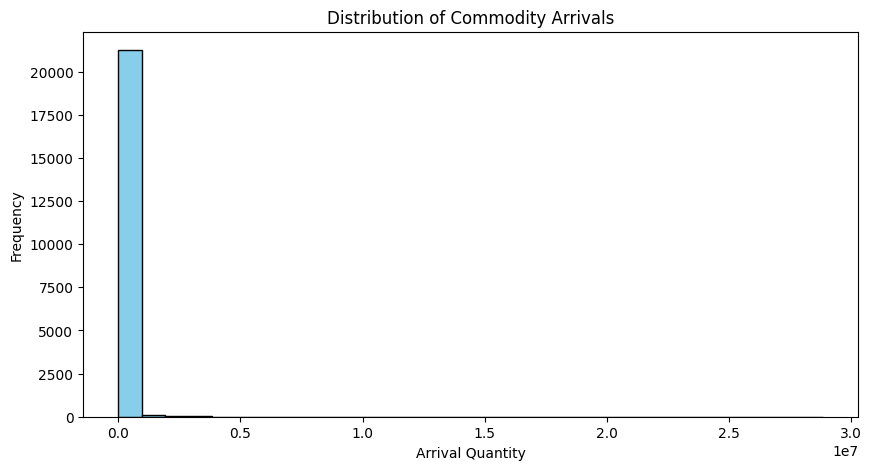

In [31]:
# 1. Arrival Distribution Histogram
plt.figure(figsize=(10,5))
plt.hist(pdf['Arrival_int'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Commodity Arrivals')
plt.xlabel('Arrival Quantity')
plt.ylabel('Frequency')
plt.show()



# Top 10 Commodities by Total Arrival (Bar Chart)

commodity_totals dtype: int32
commodity_totals:
 Commodity
Coconut           397821985
Tender Coconut    226740122
Paddy              18554513
Maize              15460281
Onion               9826018
Rice                9159688
Potato              4467185
Green Ginger        2952505
Cotton              2861896
Tomato              2858265
Name: Arrival_int, dtype: int32


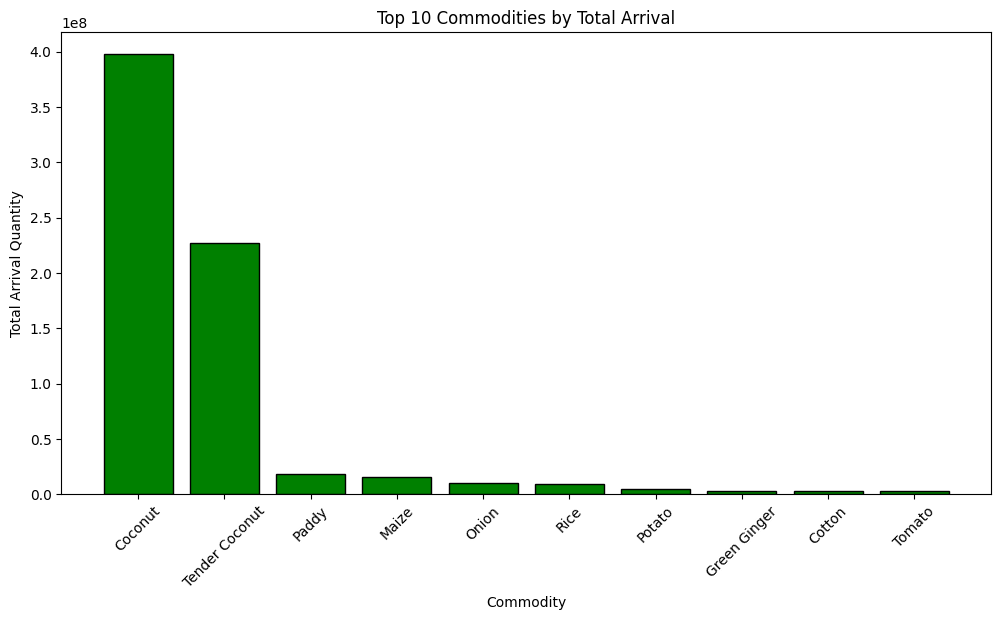

In [32]:
# 2. Top 10 Commodities by Total Arrival (Bar Chart)
commodity_totals = pdf.groupby('Commodity')['Arrival_int'].sum().sort_values(ascending=False).head(10)
print("commodity_totals dtype:", commodity_totals.dtype)
print("commodity_totals:\n", commodity_totals)

plt.figure(figsize=(12,6))
plt.bar(commodity_totals.index, commodity_totals.values, color='green', edgecolor='black')
plt.title('Top 10 Commodities by Total Arrival')
plt.xlabel('Commodity')
plt.ylabel('Total Arrival Quantity')
plt.xticks(rotation=45)
plt.show()



# Market Arrivals by District (Pie Chart)

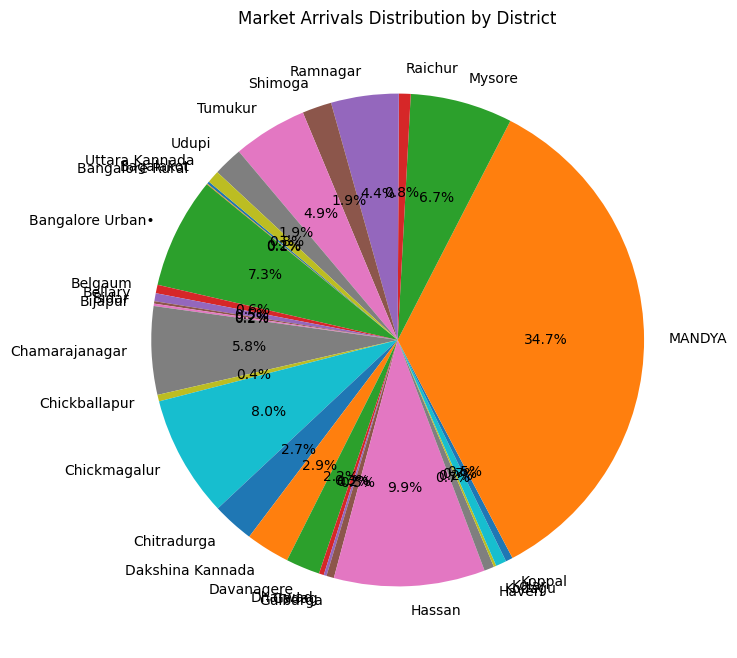

In [33]:
# 3. Market Arrivals by District (Pie Chart)
district_totals = pdf.groupby('District Name')['Arrival_int'].sum()
district_totals.plot.pie(autopct='%1.1f%%', figsize=(8,8), startangle=140)
plt.title('Market Arrivals Distribution by District')
plt.ylabel('')
plt.show()



# Scatter Plot: Arrival Quantity vs Commodity

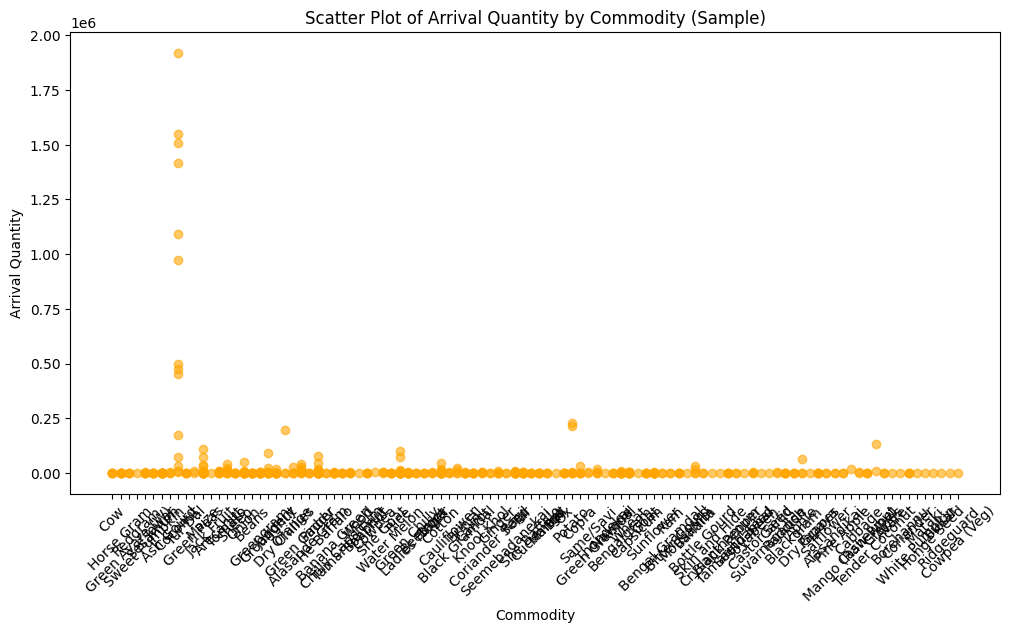

In [34]:
# 4. Scatter Plot: Arrival Quantity vs Commodity (sampled for clarity)
sample_pdf = pdf.sample(500)
plt.figure(figsize=(12,6))
plt.scatter(sample_pdf['Commodity'], sample_pdf['Arrival_int'], alpha=0.6, color='orange')
plt.title('Scatter Plot of Arrival Quantity by Commodity (Sample)')
plt.xlabel('Commodity')
plt.ylabel('Arrival Quantity')
plt.xticks(rotation=45)
plt.show()

# Literacy Rate Analysis

In [35]:
import pandas as pd
df = pd.read_csv("datafile.csv")
grand_total_arrival = df['Arrival'].sum()
num_districts = df['District Name'].nunique()
df_district_agg = df.groupby('District Name')['Arrival'].sum()
avg_arrival_per_district = df_district_agg.mean()

print(f"Grand Total Commodity Arrival: {grand_total_arrival:,.0f}")
print(f"Number of Districts: {num_districts:,}")
print(f"Average Arrival per District: {avg_arrival_per_district:,.2f}")

Grand Total Commodity Arrival: 721,413,897
Number of Districts: 29
Average Arrival per District: 24,876,341.28


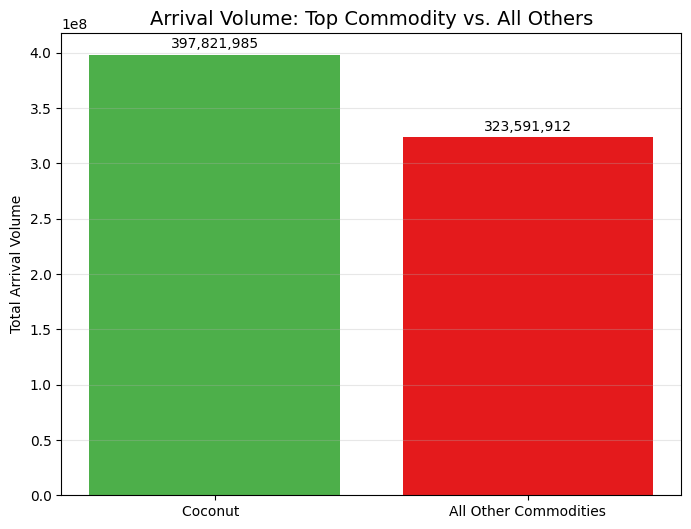

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df_agg = df.groupby('Commodity')['Arrival'].sum().reset_index()
top_commodity_row = df_agg.sort_values(by='Arrival', ascending=False).iloc[0]
top_commodity_name = top_commodity_row['Commodity']
top_commodity_arrival = top_commodity_row['Arrival']

grand_total_arrival = df_agg['Arrival'].sum()
other_commodities_arrival = grand_total_arrival - top_commodity_arrival

categories = [top_commodity_name, 'All Other Commodities']
values = [top_commodity_arrival, other_commodities_arrival]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=['#4daf4a', '#e41a1c']) # Green for top, Red for others

plt.title('Arrival Volume: Top Commodity vs. All Others', fontsize=14)
plt.ylabel('Total Arrival Volume')
plt.grid(axis='y', alpha=0.3)

for bar, v in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() * 1.01, 
             f'{v:,.0f}', 
             ha='center', 
             va='bottom',
             fontsize=10)
plt.show()

#  Scheduled Caste Analysis

# Equivalent to Literacy Rate Visualization (Bar Plot)

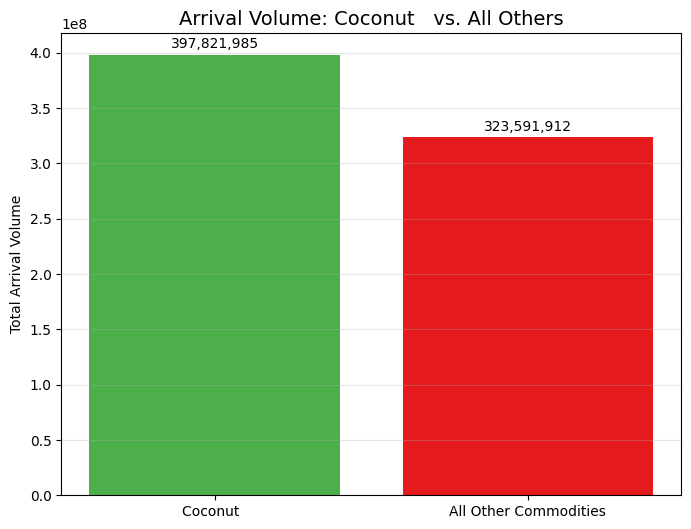

In [37]:
df_agg = df.groupby('Commodity')['Arrival'].sum().reset_index()
top_commodity_row = df_agg.sort_values(by='Arrival', ascending=False).iloc[0]
top_commodity_name = top_commodity_row['Commodity']
top_commodity_arrival = top_commodity_row['Arrival']
grand_total_arrival = df_agg['Arrival'].sum()
other_commodities_arrival = grand_total_arrival - top_commodity_arrival

categories = [top_commodity_name, 'All Other Commodities']
values = [top_commodity_arrival, other_commodities_arrival]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=['#4daf4a', '#e41a1c']) # Green for top, Red for others

plt.title(f'Arrival Volume: {top_commodity_name} vs. All Others', fontsize=14)
plt.ylabel('Total Arrival Volume')
plt.grid(axis='y', alpha=0.3)

for bar, v in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() * 1.01, 
             f'{v:,.0f}', 
             ha='center', 
             va='bottom',
             fontsize=10)
plt.show()

# Equivalent to Literacy Rate Calculation

In [38]:
grand_total_arrival = df['Arrival'].sum()
num_districts = df['District Name'].nunique()
df_district_agg = df.groupby('District Name')['Arrival'].sum()
avg_arrival_per_district = df_district_agg.mean()


print(f"Grand Total Commodity Arrival: {grand_total_arrival:,.0f}")
print(f"Number of Districts: {num_districts:,}")
print(f"Average Arrival per District: {avg_arrival_per_district:,.2f}")

Grand Total Commodity Arrival: 721,413,897
Number of Districts: 29
Average Arrival per District: 24,876,341.28


# Equivalent to Filtering for 'Scheduled Caste'

In [39]:
top_commodity_data = df[df['Commodity'].str.contains('Coconut', na=False, case=False)]

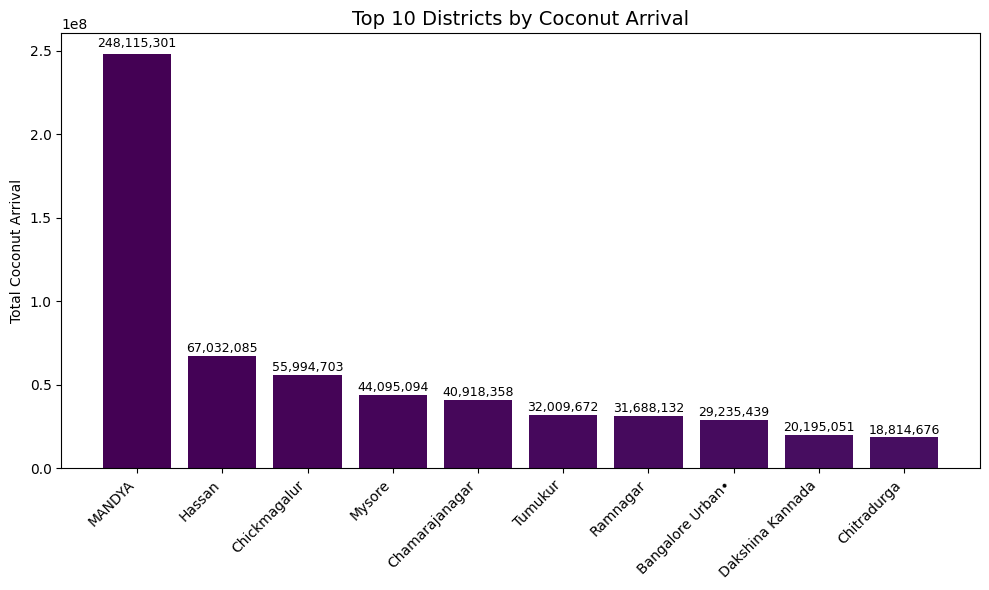

In [40]:
top_commodity_data = df[df['Commodity'].str.contains('Coconut', na=False, case=False)]
df_coconut_agg = top_commodity_data.groupby('District Name')['Arrival'].sum().sort_values(ascending=False).reset_index()
df_top10_coconut = df_coconut_agg.head(10)
categories = df_top10_coconut['District Name']
values = df_top10_coconut['Arrival']

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=plt.cm.viridis(range(len(categories)))) 
plt.title(f'Top 10 Districts by Coconut Arrival', fontsize=14)
plt.ylabel('Total Coconut Arrival')
plt.xticks(rotation=45, ha='right')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height * 1.01,
             f'{height:,.0f}', 
             ha='center', 
             va='bottom',
             fontsize=9) 

plt.tight_layout()
plt.show()

 # Heatmap Style Visualization

C:\Users\rshiv\AppData\Local\Temp\ipykernel_7728\1655903397.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df_filtered.pivot_table(index='Commodity', columns='Month', values='Arrival', aggfunc='sum', fill_value=0)
C:\Users\rshiv\AppData\Local\Temp\ipykernel_7728\1655903397.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_annot = (df_pivot / 1000000).applymap(lambda x: f'{x:.1f}M')


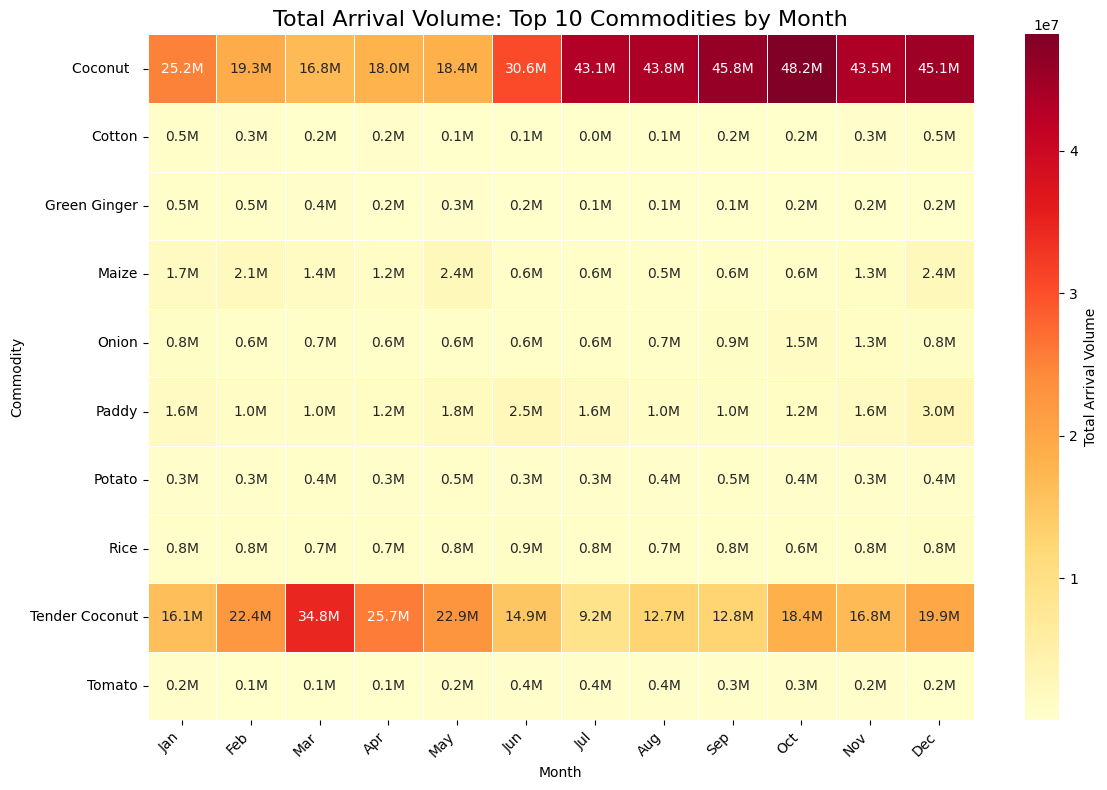

In [41]:
top_10_commodities = df.groupby('Commodity')['Arrival'].sum().nlargest(10).index
df_filtered = df[df['Commodity'].isin(top_10_commodities)].copy()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_filtered['Month'] = pd.Categorical(df_filtered['Month'], categories=month_order, ordered=True)
df_pivot = df_filtered.pivot_table(index='Commodity', columns='Month', values='Arrival', aggfunc='sum', fill_value=0)
df_annot = (df_pivot / 1000000).applymap(lambda x: f'{x:.1f}M')

# --- Heatmap Generation ---
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(df_pivot,
            cmap='YlOrRd', # Matches the color map
            annot=df_annot, # Annotated text (in millions)
            fmt='s', # Use string format
            linewidths=.5,
            ax=ax,
            cbar_kws={'label': 'Total Arrival Volume'})
ax.set_title("Total Arrival Volume: Top 10 Commodities by Month", fontsize=16)
ax.set_xlabel("Month")
ax.set_ylabel("Commodity")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0) # Ensure Y-labels are horizontal
plt.xticks(rotation=45, ha='right')

fig.tight_layout()
plt.show()

# Violin Plot for Distribution Analysis

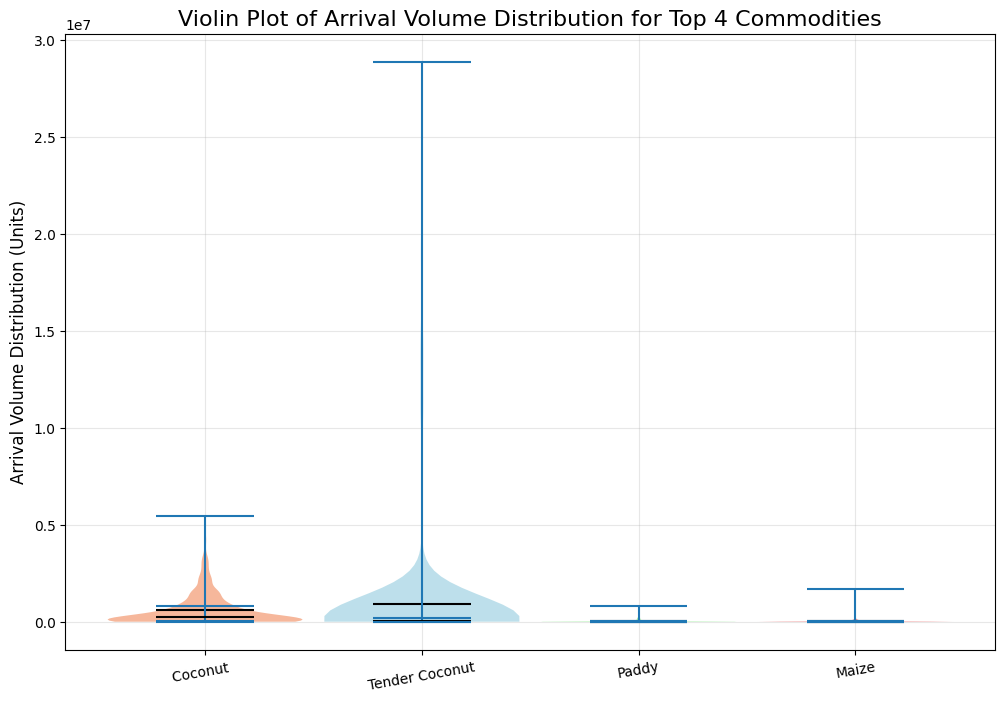

In [42]:
top_4_commodities = df.groupby('Commodity')['Arrival'].sum().nlargest(4).index.tolist()
values_violin = []
for commodity in top_4_commodities:
    distribution = df[df['Commodity'] == commodity]['Arrival'].values
    values_violin.append(distribution)
fig, ax = plt.subplots(figsize=(12, 8))
violin_parts = ax.violinplot(values_violin, 
                             showmeans=True, 
                             showmedians=True, 
                             widths=0.9,
                             quantiles=[[0.25, 0.75]] * len(top_4_commodities)
                            )

colors = ['#f4a582', 'lightblue', 'lightgreen', 'lightcoral']
for pc, color in zip(violin_parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_alpha(0.8)
violin_parts['cmeans'].set_edgecolor('black')
violin_parts['cmedians'].set_edgecolor('black')
ax.set_xticks(range(1, len(top_4_commodities) + 1))
ax.set_xticklabels(top_4_commodities, rotation=10, ha='center')
ax.set_ylabel('Arrival Volume Distribution (Units)', fontsize=12)
ax.set_title('Violin Plot of Arrival Volume Distribution for Top 4 Commodities', fontsize=16)
ax.grid(True, alpha=0.3)
plt.show()

# VISUALIZATION OF THE DATA USING PANDAS

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("notebook")

C:\Users\rshiv\AppData\Local\Temp\ipykernel_7728\1268779093.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_tick_labels)


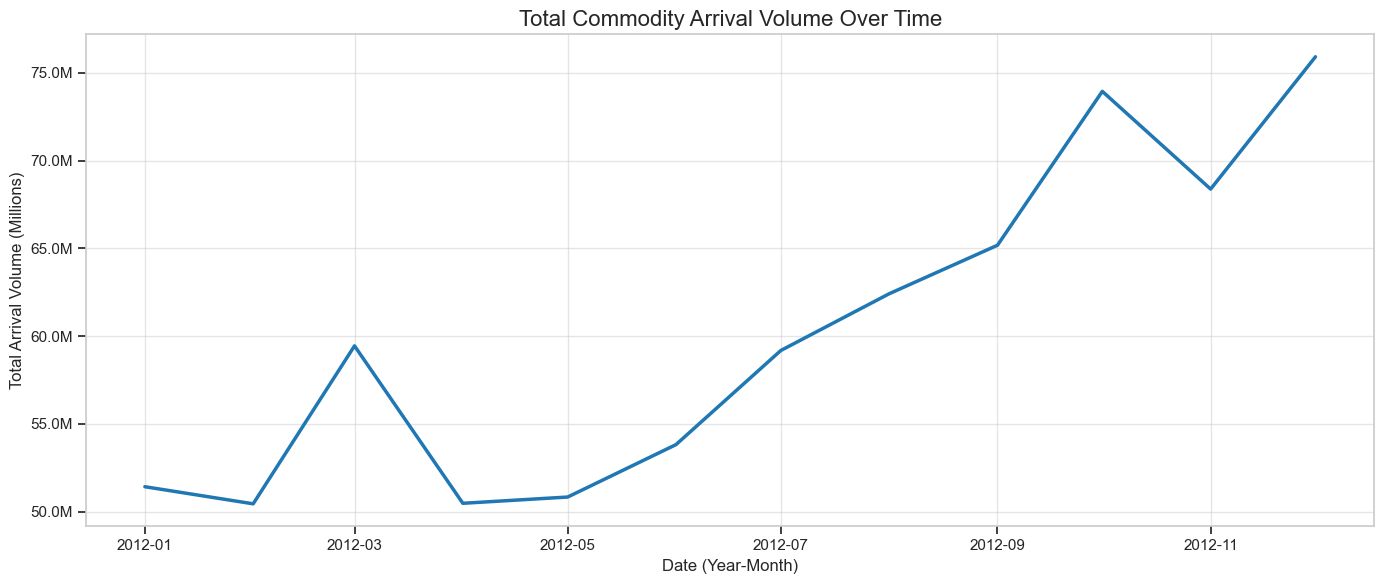

In [52]:
df['Arrival'] = pd.to_numeric(df['Arrival'], errors='coerce') 
df_cleaned = df.dropna(subset=['Arrival']).copy()

df_cleaned['Date'] = pd.to_datetime(df_cleaned['Year'].astype(str) + '-' + df_cleaned['Month'], format='%Y-%b')

df_time_series = df_cleaned.groupby('Date')['Arrival'].sum().reset_index()

# --- MATPLOTLIB/SEABORN VISUALIZATION ---
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("notebook")

plt.figure(figsize=(14, 6))

sns.lineplot(data=df_time_series, x='Date', y='Arrival', linewidth=2.5, color='#1f77b4')

y_ticks = plt.gca().get_yticks()
y_tick_labels = [f'{y/1e6:.1f}M' if y >= 0 else '0' for y in y_ticks]
plt.gca().set_yticklabels(y_tick_labels)

plt.title("Total Commodity Arrival Volume Over Time", fontsize=16)
plt.xlabel("Date (Year-Month)")
plt.ylabel("Total Arrival Volume (Millions)")
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

C:\Users\rshiv\AppData\Local\Temp\ipykernel_7728\3024680746.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_tick_labels)


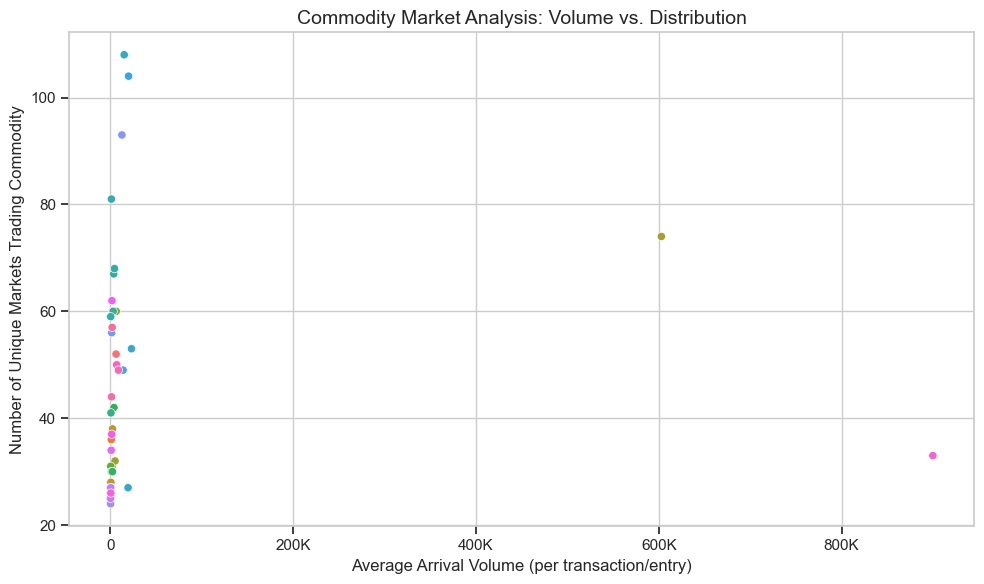

In [51]:
df['Arrival'] = pd.to_numeric(df['Arrival'], errors='coerce')
df_cleaned = df.dropna(subset=['Arrival']).copy()

avg_arrival = df_cleaned.groupby('Commodity')['Arrival'].mean().reset_index()

avg_arrival.rename(columns={'Arrival': 'Average Arrival'}, inplace=True) 

market_count = df_cleaned.groupby('Commodity')['Market Name'].nunique().reset_index()
market_count.rename(columns={'Market Name': 'Market Count'}, inplace=True)

df_scatter = pd.merge(avg_arrival, market_count, on='Commodity')
top_commodities = df_scatter.sort_values(by='Market Count', ascending=False).head(50)['Commodity']
df_scatter_top = df_scatter[df_scatter['Commodity'].isin(top_commodities)]


# --- Visualization ---
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_scatter_top, 
                x="Average Arrival", # Corrected column name
                y="Market Count", 
                hue="Commodity", 
                legend=False) 

x_ticks = plt.gca().get_xticks()
x_tick_labels = [f'{x/1000:,.0f}K' if x >= 1000 else f'{x:,.0f}' for x in x_ticks]
plt.gca().set_xticklabels(x_tick_labels)


plt.title("Commodity Market Analysis: Volume vs. Distribution", fontsize=14)
plt.xlabel("Average Arrival Volume (per transaction/entry)", fontsize=12)
plt.ylabel("Number of Unique Markets Trading Commodity", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\rshiv\AppData\Local\Temp\ipykernel_7728\2249851139.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_tick_labels)


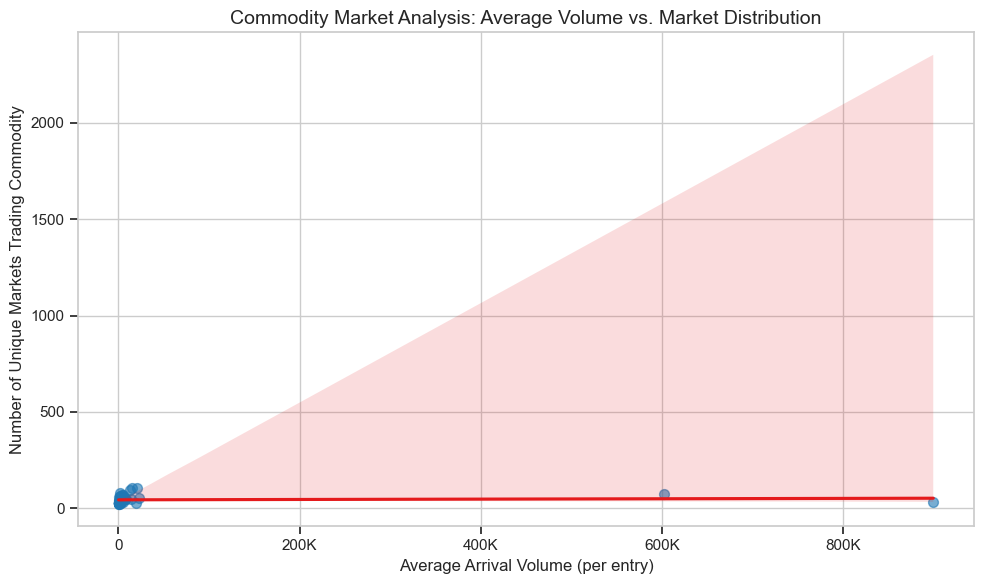

In [50]:
df['Arrival'] = pd.to_numeric(df['Arrival'], errors='coerce')
df_cleaned = df.dropna(subset=['Arrival']).copy()

avg_arrival = df_cleaned.groupby('Commodity')['Arrival'].mean().reset_index()
avg_arrival.rename(columns={'Arrival': 'Average Arrival'}, inplace=True) 

market_count = df_cleaned.groupby('Commodity')['Market Name'].nunique().reset_index()
market_count.rename(columns={'Market Name': 'Market Count'}, inplace=True)

df_regplot = pd.merge(avg_arrival, market_count, on='Commodity')

top_commodities = df_regplot.sort_values(by='Market Count', ascending=False).head(50)['Commodity']
df_regplot_top = df_regplot[df_regplot['Commodity'].isin(top_commodities)]


# --- Visualization ---
plt.figure(figsize=(10, 6))

sns.regplot(data=df_regplot_top, 
            x="Average Arrival", 
            y="Market Count", 
            scatter_kws={"alpha":0.6, "s": 50}, 
            line_kws={"color": "#e41a1c"}) 

x_ticks = plt.gca().get_xticks()
x_tick_labels = [f'{x/1000:,.0f}K' if x >= 1000 else f'{x:,.0f}' for x in x_ticks]
plt.gca().set_xticklabels(x_tick_labels)


plt.title("Commodity Market Analysis: Average Volume vs. Market Distribution", fontsize=14)
plt.xlabel("Average Arrival Volume (per entry)", fontsize=12)
plt.ylabel("Number of Unique Markets Trading Commodity", fontsize=12)
plt.tight_layout()
plt.show()

In [49]:
df_feat_equivalent_cols = df[[
    'District Name', 
    'Commodity', 
    'Year', 
    'Month', 
    'Arrival', 
    'Unit'
]]

print("--- Commodity Market Data (All Years - Top 20 Records) ---")
print(df_feat_equivalent_cols.head(20))

--- Commodity Market Data (All Years - Top 20 Records) ---
   District Name      Commodity  Year Month  Arrival        Unit
0      Bagalakot          Bajra  2012   Jan      242  Quintal   
1      Bagalakot         Bull    2012   Jan       65    Numbers 
2      Bagalakot          Cow    2012   Jan      151    Numbers 
3      Bagalakot         Goat    2012   Jan      492    Numbers 
4      Bagalakot      Groundnut  2012   Jan      364  Quintal   
5      Bagalakot   He Baffalo    2012   Jan       41    Numbers 
6      Bagalakot          Jowar  2012   Jan        4  Quintal   
7      Bagalakot          Maize  2012   Jan    21669  Quintal   
8      Bagalakot           Ox    2012   Jan      233    Numbers 
9      Bagalakot          Ram    2012   Jan      180    Numbers 
10     Bagalakot          Sajje  2012   Jan     4649  Quintal   
11     Bagalakot  She Baffalo    2012   Jan      290    Numbers 
12     Bagalakot     She Goat    2012   Jan     2948    Numbers 
13     Bagalakot        Sheep  

## Project Summary

- PySpark facilitated scalable data cleaning, transformation, sampling, and aggregation on this market arrivals dataset.
- Major commodities (e.g., maize, groundnut, livestock) and high-activity districts/markets identified.
- RDD and DataFrame operations were used for sampling and analytics to demonstrate core big data techniques.
- The workflow matches the pedagogical steps for Big Data Analytics using PySpark.
